In [15]:
from scipy.ndimage import imread
from scipy.misc import imsave, imresize

import pylab as plt
import numpy as np
from scipy import spatial
from sklearn import neighbors

from collections import defaultdict

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 9.0)

In [2]:
def print_status(msg):
    from IPython.display import clear_output
    import sys
    clear_output()
    print msg
    sys.stdout.flush()

In [3]:
I = imread('../images/voronoi/cat.jpg')
I.shape

(1024, 1024, 3)

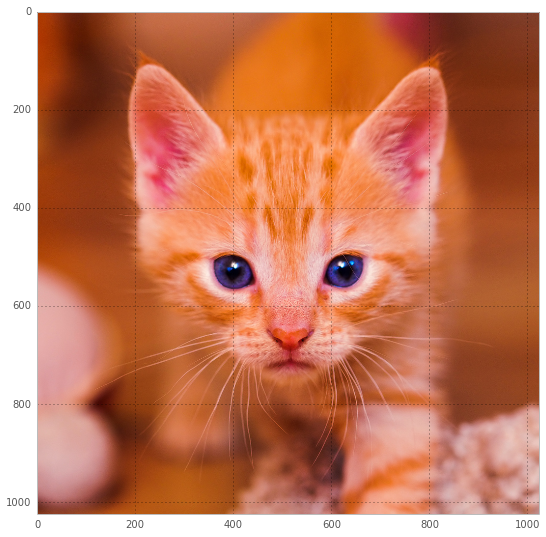

In [4]:
plt.imshow(I)

In [10]:
nseeds = 5000

In [11]:
seeds = np.vstack([np.random.uniform(size=nseeds) * I.shape[0],
                   np.random.uniform(size=nseeds) * I.shape[1]]).T

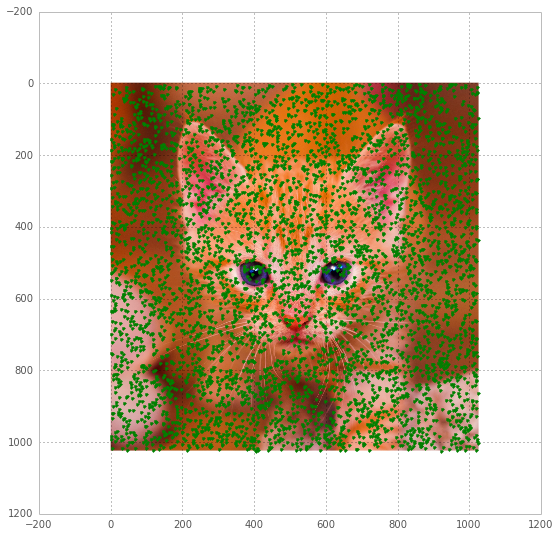

In [12]:
plt.imshow(I)
plt.plot(seeds[:,1], seeds[:,0], 'g.')

CPU times: user 1min 5s, sys: 289 ms, total: 1min 6s
Wall time: 1min 6s


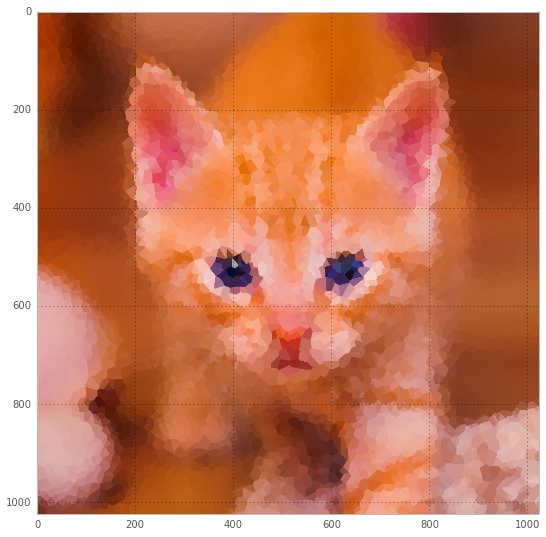

In [13]:
def voronoify_np():
    cells = defaultdict(list)

    for r in range(I.shape[0]):
        for c in range(I.shape[1]):
            label = np.argmin(np.sum((seeds - [r,c])**2, axis=1))
            cells[label].append([r,c])

    I2 = I.copy()
    for idx in cells.values():
        idx = np.array(idx)
        mean_col = I[idx[:,0], idx[:,1]].mean(axis=0)
        I2[idx[:,0], idx[:,1]] = mean_col

    plt.imshow(I2)
    
    
%time voronoify_np()

CPU times: user 4.04 s, sys: 102 ms, total: 4.14 s
Wall time: 4.16 s


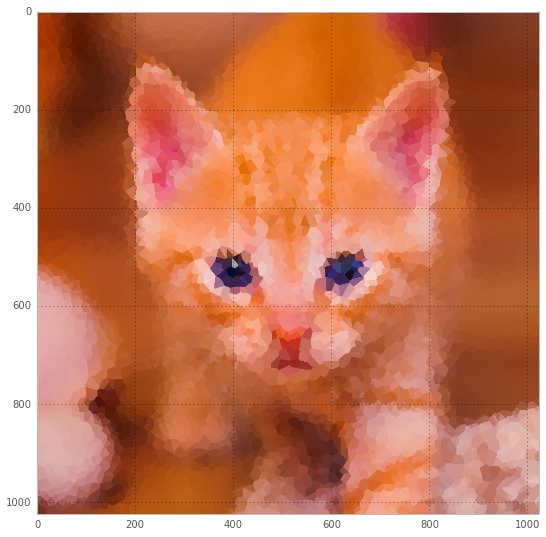

In [14]:
def voronoify_sklearn(I, seeds):
    tree_sklearn = neighbors.KDTree(seeds)
    pixels = ([(r,c) for r in range(I.shape[0]) for c in range(I.shape[1])])
    d, pos = tree_sklearn.query(pixels)

    cells = defaultdict(list)
    for i in range(len(pos)):
        cells[pos[i][0]].append(pixels[i])
    
    I2 = I.copy()
    for idx in cells.values():
        idx = np.array(idx)
        mean_col = I[idx[:,0], idx[:,1]].mean(axis=0)
        I2[idx[:,0], idx[:,1]] = mean_col
    
    return I2
    
    
%time I2 = voronoify_sklearn(I, seeds)
plt.imshow(I2)